In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tele=pd.read_csv(r'F:\Data science\Projects\telecom_users.csv', na_values=[' '])
tele

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [3]:
tele.shape

(5986, 22)

In [4]:
tele.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
tele.isna().sum()/tele.shape[0]*100

Unnamed: 0          0.000000
customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.167056
Churn               0.000000
dtype: float64

In [6]:
tele[['SeniorCitizen','InternetService']].groupby(['InternetService','SeniorCitizen']).size()

InternetService  SeniorCitizen
DSL              0                1847
                 1                 221
Fiber optic      0                1923
                 1                 704
No               0                1250
                 1                  41
dtype: int64

In [7]:
tele['InternetService'].unique()

array(['No', 'Fiber optic', 'DSL'], dtype=object)

# What percentages of people prefer phone services?

In [8]:
tele[tele['PhoneService']=='Yes'].count()/tele.shape[0]*100

Unnamed: 0          90.143669
customerID          90.143669
gender              90.143669
SeniorCitizen       90.143669
Partner             90.143669
Dependents          90.143669
tenure              90.143669
PhoneService        90.143669
MultipleLines       90.143669
InternetService     90.143669
OnlineSecurity      90.143669
OnlineBackup        90.143669
DeviceProtection    90.143669
TechSupport         90.143669
StreamingTV         90.143669
StreamingMovies     90.143669
Contract            90.143669
PaperlessBilling    90.143669
PaymentMethod       90.143669
MonthlyCharges      90.143669
TotalCharges        90.010023
Churn               90.143669
dtype: float64

# Is the charges for the services are biased?

In [9]:
tele[['gender','MonthlyCharges']].groupby(['gender']).mean()

,MonthlyCharges
gender,
Female,65.240668
Male,64.380148


In [10]:
tele['MonthlyCharges'].max()

118.75

In [11]:
tele['MonthlyCharges'].min()

18.25

In [12]:
tele['MonthlyCharges'].describe()

count    5986.000000
mean       64.802213
std        30.114702
min        18.250000
25%        35.650000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

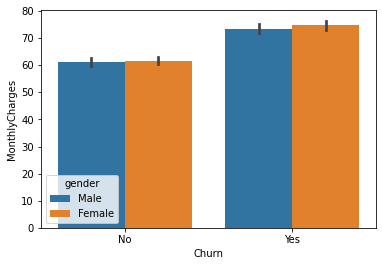

In [13]:
sns.barplot(x='Churn', y='MonthlyCharges', data= tele, hue='gender')
plt.show()

# Who uses internet more? Married or unmarried?

In [14]:
tele[tele.InternetService!='No'][ 'Partner']

1        No
2       Yes
3        No
4        No
5       Yes
       ... 
5979    Yes
5980     No
5981    Yes
5982    Yes
5984     No
Name: Partner, Length: 4695, dtype: object

In [15]:
tele[tele.InternetService!='No'][ 'Partner'].groupby(tele.Partner).count()  #thus used by more unmarried people

Partner
No     2420
Yes    2275
Name: Partner, dtype: int64

In [16]:
tele['TotalCharges'].median()

1412.15

In [17]:
tele['TotalCharges'].mean()

2298.0606174698796

In [18]:
tele['TotalCharges'].fillna(value=tele['TotalCharges'].median(), inplace=True)

In [19]:
tele.drop(columns=['Unnamed: 0','customerID'], axis=1, inplace= True)

In [20]:
tele.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [21]:
tele['Churn'].nunique()

2

In [22]:
tele['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [23]:
tele['Churn'].value_counts().index

Index(['No', 'Yes'], dtype='object')

In [24]:
churn_count=tele['Churn'].value_counts().tolist()
churn_label=tele['Churn'].value_counts().index

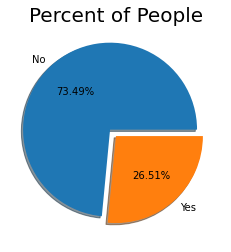

In [25]:
plt.pie(churn_count, labels= churn_label, autopct='%0.2f%%',
       shadow= True, explode=[0.1,0])
plt.title('Percent of People', size=20)
plt.show()

In [26]:
tele['Partner'].value_counts()

No     3082
Yes    2904
Name: Partner, dtype: int64

In [27]:
tele[['Partner','Churn']].groupby('Churn').count()

,Partner
Churn,
No,4399
Yes,1587


C:\Users\arpna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


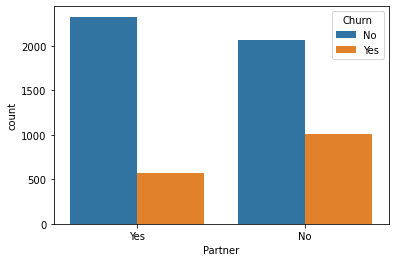

In [28]:
sns.countplot(tele['Partner'], hue=tele['Churn'])
plt.title('')
plt.show()

C:\Users\arpna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


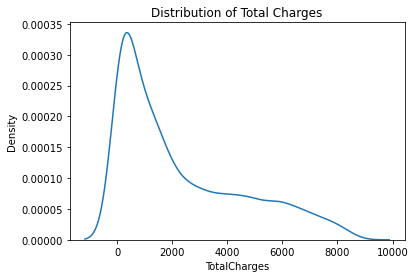

In [29]:
#Distribution plot of total charges and monthly charges

sns.distplot(tele['TotalCharges'], hist=False)
plt.title('Distribution of Total Charges')
plt.show()

C:\Users\arpna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


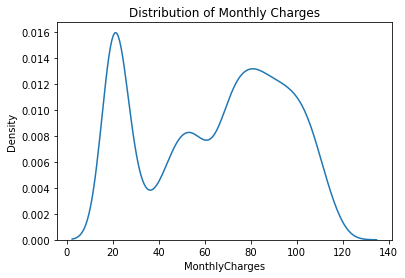

In [30]:
#Distribution plot of total charges and monthly charges

sns.distplot(tele['MonthlyCharges'], hist=False)
plt.title('Distribution of Monthly Charges')
plt.show()

C:\Users\arpna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\arpna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


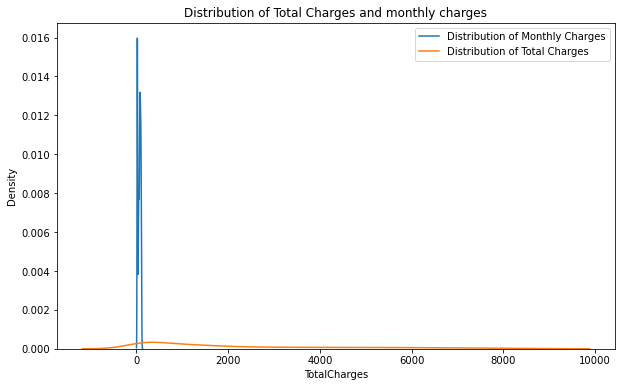

In [31]:
#Distribution plot of total charges and monthly charges
plt.figure(figsize=(10,6))

sns.distplot(tele['MonthlyCharges'], hist=False, label='Distribution of Monthly Charges')
sns.distplot(tele['TotalCharges'], hist=False, label='Distribution of Total Charges')
plt.title('Distribution of Total Charges and monthly charges')
plt.legend()
plt.show()

C:\Users\arpna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\arpna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


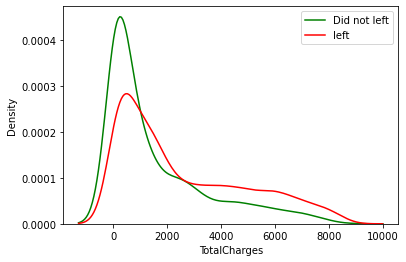

In [32]:
#distribution plot of total charges according to Churn
sns.distplot(tele[tele['Churn']=='Yes']['TotalCharges'], hist=False, color='g',
             label='Did not left')
sns.distplot(tele[tele['Churn']=='No']['TotalCharges'], hist=False, color='r',
             label='left')
plt.legend()
plt.show()

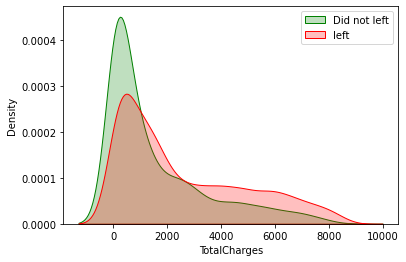

In [33]:
#distribution plot of total charges according to Churn
sns.kdeplot(tele[tele['Churn']=='Yes']['TotalCharges'], color='g',
             label='Did not left', shade=True)
sns.kdeplot(tele[tele['Churn']=='No']['TotalCharges'], color='r',
             label='left', shade=True)
plt.legend()
plt.show()

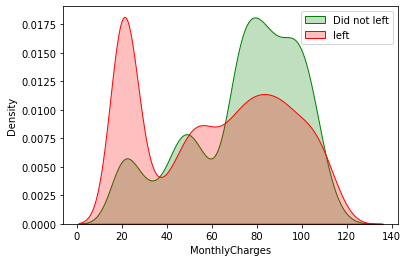

In [34]:
#distribution plot of total charges according to Churn
sns.kdeplot(tele[tele['Churn']=='Yes']['MonthlyCharges'], color='g',
             label='Did not left', shade=True)
sns.kdeplot(tele[tele['Churn']=='No']['MonthlyCharges'], color='r',
             label='left', shade=True)
plt.legend()
plt.show()

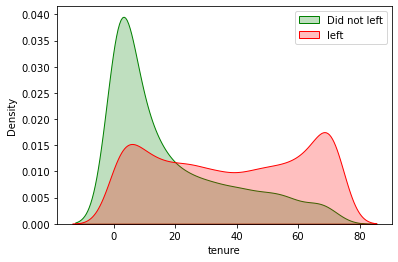

In [35]:
#distribution plot of total charges according to Churn
sns.kdeplot(tele[tele['Churn']=='Yes']['tenure'], color='g',
             label='Did not left', shade=True)
sns.kdeplot(tele[tele['Churn']=='No']['tenure'], color='r',
             label='left', shade=True)
plt.legend()
plt.show()

<AxesSubplot:xlabel='TotalCharges', ylabel='PhoneService'>

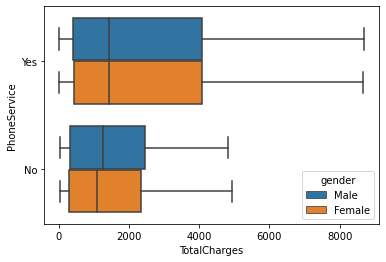

In [36]:
sns.boxplot(y='PhoneService', x='TotalCharges', data=tele,
              hue='gender')

C:\Users\arpna\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\arpna\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


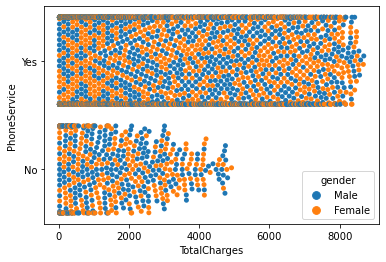

In [37]:
sns.swarmplot(y='PhoneService', x='TotalCharges', data=tele,
              hue='gender')
plt.show()

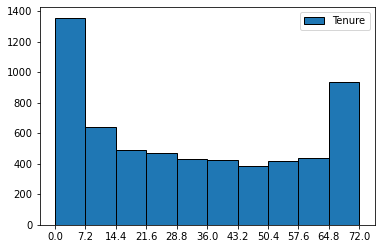

In [38]:
freq, bins=np.histogram(tele['tenure'], bins=10)
plt.hist(tele['tenure'], bins=10, ec='k', label='Tenure')
plt.xticks(bins)
plt.legend()
plt.show()

In [39]:
tele.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [40]:
tele['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Bank transfer (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

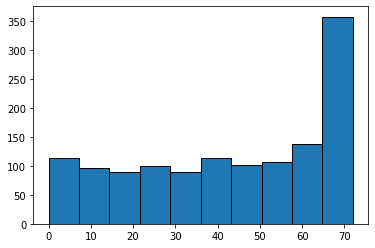

In [41]:
plt.hist(tele[tele['PaymentMethod']=='Credit card (automatic)']['tenure'], ec='k')
plt.show()

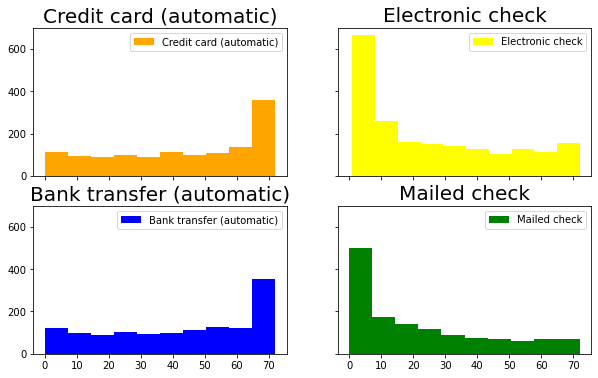

In [42]:
fig,ax = plt.subplots(2,2,figsize = (10,6),sharex = True,sharey = True)
ax[0,0].hist(tele[tele['PaymentMethod']=='Credit card (automatic)']['tenure'],color = 'orange',label = 'Credit card (automatic)')
ax[0,0].legend()

ax[0,0].set_title('Credit card (automatic)',size =20)

ax[1,0].hist(tele[tele['PaymentMethod']=='Bank transfer (automatic)']['tenure'],color = 'blue',label = 'Bank transfer (automatic)')
ax[1,0].legend()

ax[1,0].set_title('Bank transfer (automatic)',size =20)
ax[0,1].hist(tele[tele['PaymentMethod']=='Electronic check']['tenure'],color = 'yellow',label = 'Electronic check')
ax[0,1].legend()

ax[0,1].set_title('Electronic check',size =20)
ax[1,1].hist(tele[tele['PaymentMethod']=='Mailed check']['tenure'],color = 'green',label = 'Mailed check')
ax[1,1].legend()

ax[1,1].set_title('Mailed check',size =20)

plt.show()

In [43]:
tele['Contract'].unique()

array(['Two year', 'Month-to-month', 'One year'], dtype=object)

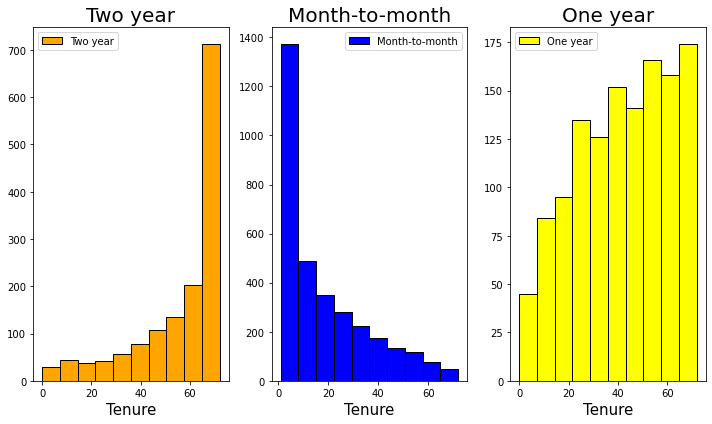

In [44]:
fig,ax = plt.subplots(1,3,figsize = (10,6))
ax[0].hist(tele[tele['Contract']=='Two year']['tenure'],color = 'orange',label = 'Two year',ec = 'k')
ax[0].legend()

ax[0].set_title('Two year',size =20)
ax[0].set_xlabel('Tenure', fontsize=15)

ax[1].hist(tele[tele['Contract']=='Month-to-month']['tenure'],color = 'blue',label = 'Month-to-month',ec ='k')
ax[1].legend()

ax[1].set_title('Month-to-month',size =20)
ax[1].set_xlabel('Tenure', fontsize=15)
ax[2].hist(tele[tele['Contract']=='One year']['tenure'],color = 'yellow',label = 'One year',ec = 'k')
ax[2].legend()

ax[2].set_title('One year',size =20)
plt.xlabel('Tenure', fontsize=15)
plt.tight_layout()
plt.show()

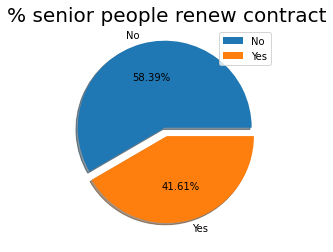

In [45]:
tele2 = tele['Churn'].value_counts().index
tele1 = tele[tele['SeniorCitizen']==1]['Churn'].value_counts().tolist()
plt.pie(tele1,labels = tele2,autopct ='%.2f%%',shadow =True, explode =[0.1,0])
plt.title('% senior people renew contract',size =20)
plt.legend()
plt.show()

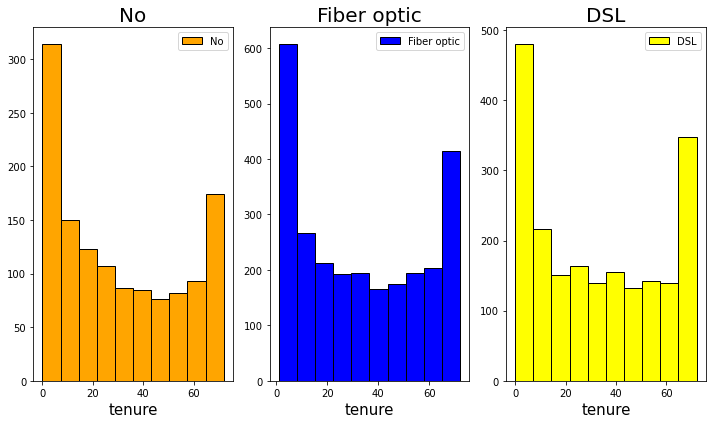

In [46]:
fig,ax = plt.subplots(1,3,figsize = (10,6))
ax[0].hist(tele[tele['InternetService']=='No']['tenure'],color = 'orange',label = 'No',ec = 'k')
ax[0].set_xlabel('tenure',size =15)
ax[0].legend()

ax[0].set_title('No',size =20)

ax[1].hist(tele[tele['InternetService']=='Fiber optic']['tenure'],color = 'blue',label = 'Fiber optic',ec ='k')
ax[1].set_xlabel('tenure',size =15)
ax[1].legend()

ax[1].set_title('Fiber optic',size =20)
ax[2].hist(tele[tele['InternetService']=='DSL']['tenure'],color = 'yellow',label = 'DSL',ec = 'k')
ax[2].set_xlabel('tenure',size =15)
ax[2].legend()

ax[2].set_title('DSL',size =20)

plt.tight_layout()
plt.show()

In [47]:
tele.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [48]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder() 
ohe.fit_transform(tele[['gender']]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [49]:
ohe.categories_[0]

array(['Female', 'Male'], dtype=object)

In [50]:
ohe_gender=pd.DataFrame(ohe.fit_transform(tele[['gender']]).toarray(),
                        columns=ohe.categories_[0])
ohe_gender

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
5981,0.0,1.0
5982,1.0,0.0
5983,0.0,1.0
5984,0.0,1.0


In [51]:
tele.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
tele1=tele.copy()

In [54]:
tele1['gender'] = le.fit_transform(tele1['gender'])
tele1['Partner'] = le.fit_transform(tele1['Partner'])
tele1['Dependents'] = le.fit_transform(tele1['Dependents'])
tele1['PhoneService'] = le.fit_transform(tele1['PhoneService'])
tele1['MultipleLines'] = le.fit_transform(tele1['MultipleLines'])
tele1['InternetService'] = le.fit_transform(tele1['InternetService'])
tele1['OnlineSecurity'] = le.fit_transform(tele1['OnlineSecurity'])
tele1['OnlineBackup'] = le.fit_transform(tele1['OnlineBackup'])
tele1['DeviceProtection'] = le.fit_transform(tele1['DeviceProtection'])
tele1['TechSupport'] = le.fit_transform(tele1['TechSupport'])
tele1['StreamingTV'] = le.fit_transform(tele1['StreamingTV'])
tele1['StreamingMovies'] = le.fit_transform(tele1['StreamingMovies'])
tele1['Contract'] = le.fit_transform(tele1['Contract'])
tele1['PaperlessBilling'] = le.fit_transform(tele1['PaperlessBilling'])
tele1['PaymentMethod'] = le.fit_transform(tele1['PaymentMethod'])

In [55]:
tele1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,No
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,No
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,Yes
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,No
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,Yes
5982,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,No
5983,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,No
5984,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,Yes


In [56]:
X=tele1.drop(columns='Churn')
y=tele1['Churn']

In [57]:
X.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [58]:
tele1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
tele1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,No
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,No
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,Yes
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,No
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,No


In [60]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50


# Checking basic model

# KNeighborClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1111)

In [63]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
knn_predicttest=knn.predict(X_test)
knn_predicttrain=knn.predict(X_train)

In [65]:
from sklearn.metrics import accuracy_score
knn_acc_test=accuracy_score(knn_predicttest, y_test)
knn_acc_test

0.7661469933184856

In [66]:
knn_acc_train=accuracy_score(knn_predicttrain, y_train)
knn_acc_train

0.8262529832935561

# Finding optimal number of neighbors model

In [67]:
accuracy=[]
for i in range(1,40,2):
    knn_new=KNeighborsClassifier(n_neighbors =i)   #changing no. of k values in this function
    knn_new.fit(X_test,y_test)
    knn_new_predict=knn_new.predict(X_test)
    accuracy.append(accuracy_score(y_test, knn_new_predict))

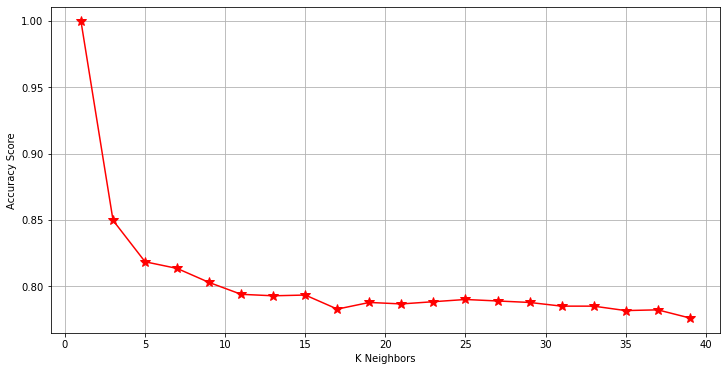

In [68]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40,2),accuracy, marker='*',ms=10,color='red')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Score')
plt.grid()
plt.show()

# Checking Skewness and kurtosis of all continuous data

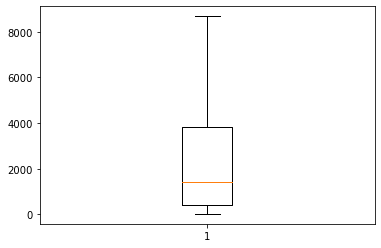

In [69]:
plt.boxplot(tele['TotalCharges'])
plt.show()

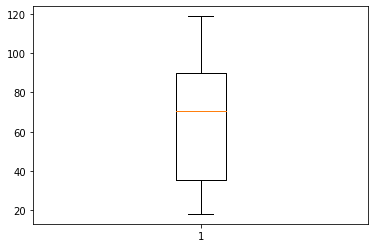

In [70]:
plt.boxplot(tele['MonthlyCharges'])
plt.show()

# KNeighborClassifier with cross_val_score

In [71]:
from sklearn.model_selection import cross_val_score
knn2 = KNeighborsClassifier(5)
score = cross_val_score(knn2,X,y,cv = 5)
score.mean()

0.7626117324474235

# Logistic Regressor

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lgr=LogisticRegression()
lgr.fit(X_train, y_train)
lgr_predicttest=lgr.predict(X_test)
lgr_predicttrain=lgr.predict(X_train)

C:\Users\arpna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
lgr_acc_test=accuracy_score(lgr_predicttest, y_test)
lgr_acc_test

0.7951002227171492

In [75]:
lgr_acc_train=accuracy_score(lgr_predicttrain, y_train)
lgr_acc_train

0.8062052505966587

# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predicttest=dt.predict(X_test)
dt_predicttrain=dt.predict(X_train)

In [77]:
dt_acc_test=accuracy_score(dt_predicttest, y_test)
dt_acc_test

0.7338530066815144

In [78]:
dt_acc_train=accuracy_score(dt_predicttrain, y_train)
dt_acc_train

0.9985680190930788

# RandomForestRegressor

In [79]:
X_train.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [80]:
y_train.dtypes

dtype('O')

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(X_train, y_train)
rfr_predicttest=rfr.predict(X_test)
rfr_predicttrain=rfr.predict(X_train)

In [82]:
rfr_acc_test=accuracy_score(rfr_predicttest, y_test)
rfr_acc_test

0.7912026726057907

In [83]:
rfr_acc_train=accuracy_score(rfr_predicttrain, y_train)
rfr_acc_train

0.9985680190930788

# Support vector Machine

In [84]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_predicttrain = svc.predict(X_train)
svc_predicttest = svc.predict(X_test)

In [85]:
svc_acc_test=accuracy_score(svc_predicttest, y_test)
svc_acc_test

0.7410913140311804

In [86]:
svc_acc_train=accuracy_score(svc_predicttrain, y_train)
svc_acc_train

0.7322195704057279

In [87]:
models=['K Neighbor Classifier','Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'Support Vector Machine']
test_accuracies=[knn_acc_test,lgr_acc_test, dt_acc_test, rfr_acc_test, svc_acc_test ]
train_accuracies=[knn_acc_train,lgr_acc_train,dt_acc_train, rfr_acc_test, svc_acc_train]

# Conclusion for Accuracies of all models

In [88]:
dict={'Model':models, 'Training Accuracy':train_accuracies, 'Testing Accuracy':test_accuracies}
df=pd.DataFrame(dict)
df

,Model,Training Accuracy,Testing Accuracy
0,K Neighbor Classifier,0.826253,0.766147
1,Logistic Regression,0.806205,0.795100
2,Decision Tree,0.998568,0.733853
3,Random Forest Classifier,0.791203,0.791203
4,Support Vector Machine,0.732220,0.741091


In [89]:
df.set_index('Model')

,Training Accuracy,Testing Accuracy
Model,,
K Neighbor Classifier,0.826253,0.766147
Logistic Regression,0.806205,0.795100
Decision Tree,0.998568,0.733853
Random Forest Classifier,0.791203,0.791203
Support Vector Machine,0.732220,0.741091


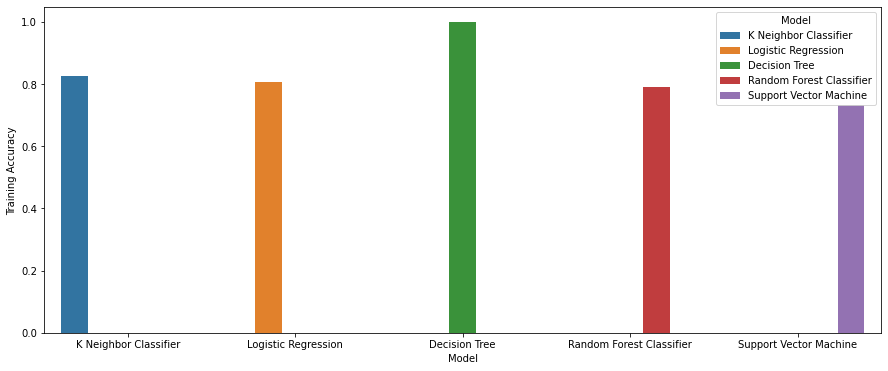

In [92]:
plt.figure(figsize=(15,6))
sns.barplot(x='Model', y='Training Accuracy', data=df, hue='Model')
plt.show()

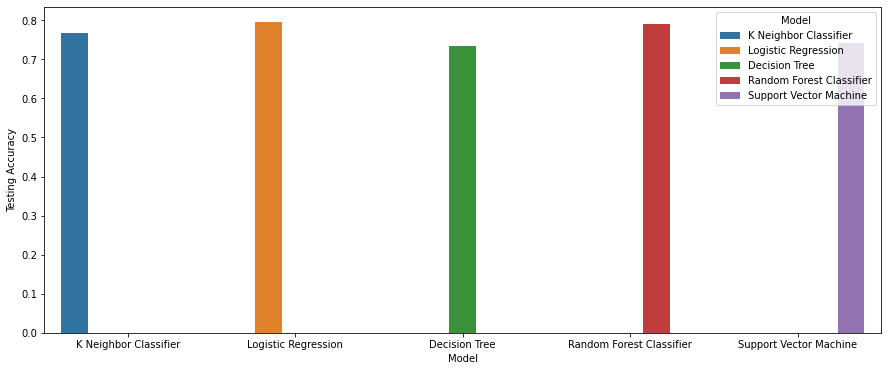

In [91]:
plt.figure(figsize=(15,6))
sns.barplot(x='Model', y='Testing Accuracy', data=df, hue='Model')
plt.show()